In [268]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys,os
%run datuslib.ipynb

#ROBADO DE LAS NOTE DE CLASES
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn


In [269]:
#CARGO DATASET

C_tweets = pd.read_csv("Data/train.csv")
C_CantTweetsEnDf=len(C_tweets.index)

In [270]:
#Quito tweets duplicados
C_CantTweetsEnDfSinDuplicados=len(C_tweets.drop_duplicates(subset='text'))

In [259]:
#Cuantos twits fueron dropeados
print("Con duplicados: ",C_CantTweetsEnDf," - ", "Sin duplicados: ",C_CantTweetsEnDfSinDuplicados)

Con duplicados:  7613  -  Sin duplicados:  7503


In [260]:
C_tweetsDuplicados = C_tweets.groupby(['text']).agg({'id':'count'})\
.rename(columns={"id": "cantidad_de_tweets"}).reset_index()

In [261]:
C_tweetsDuplicados

,text,cantidad_de_tweets
0,! Residents Return To Destroyed Homes As Washi...,1
1,# handbags Genuine Mulberry Antony Cross Body ...,1
2,#360WiseNews : China's Stock Market Crash: Are...,1
3,#360WiseNews : China's Stock Market Crash: Are...,1
4,#360WiseNews : China's Stock Market Crash: Are...,1
...,...,...
7498,Û÷We Can HelpÛª Says Denver Firefighter Work...,1
7499,å_? New Ladies Shoulder Tote #Handbag Faux Lea...,1
7500,å¤} New Ladies Shoulder Tote #Handbag Faux Lea...,1
7501,å¬'Only the sea knows how many are dead' @MSF_...,1


In [262]:
C_TOP10tweets = C_tweetsDuplicados[C_tweetsDuplicados.apply(lambda row : row['cantidad_de_tweets'] > 1, axis = 1)]\
.sort_values(by = 'cantidad_de_tweets',ascending=False).head(10)

In [263]:
acortar_texto(C_TOP10tweets)

c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [264]:
C_TOP10tweets

,text,cantidad_de_tweets,short_text
646,11-Year-Old Boy Charged With Manslaughter of T...,10,11-Year-Old Boy...
3589,He came to a land which was engulfed in tribal...,6,He came to a la...
6131,The Prophet (peace be upon him) said 'Save you...,6,The Prophet (pe...
45,#Bestnaijamade: 16yr old PKK suicide bomber wh...,6,#Bestnaijamade:...
4589,Madhya Pradesh Train Derailment: Village Youth...,5,Madhya Pradesh ...
6574,VIDEO: 'We're picking up bodies from water': R...,4,VIDEO: 'We're p...
7372,that horrible sinking feeling when youÛªve be...,4,that horrible s...
6353,To fight bioterrorism sir.,4,To fight bioter...
610,.POTUS #StrategicPatience is a strategy for #G...,4,.POTUS #Strateg...
2679,CLEARED:incident with injury:I-495 inner loop...,3,CLEARED:inciden...


In [265]:
C_TOP10tweets_menos = C_tweetsDuplicados[C_tweetsDuplicados.apply(lambda row : row['cantidad_de_tweets'] > 1, axis = 1)]\
.sort_values(by = 'cantidad_de_tweets',ascending=False).tail(10)

In [266]:
acortar_texto(C_TOP10tweets_menos)

c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


## PLOT TOP 10 MAS TWITEADOS

Text(0.5, 1.0, 'Top 10 tweets mas populares')

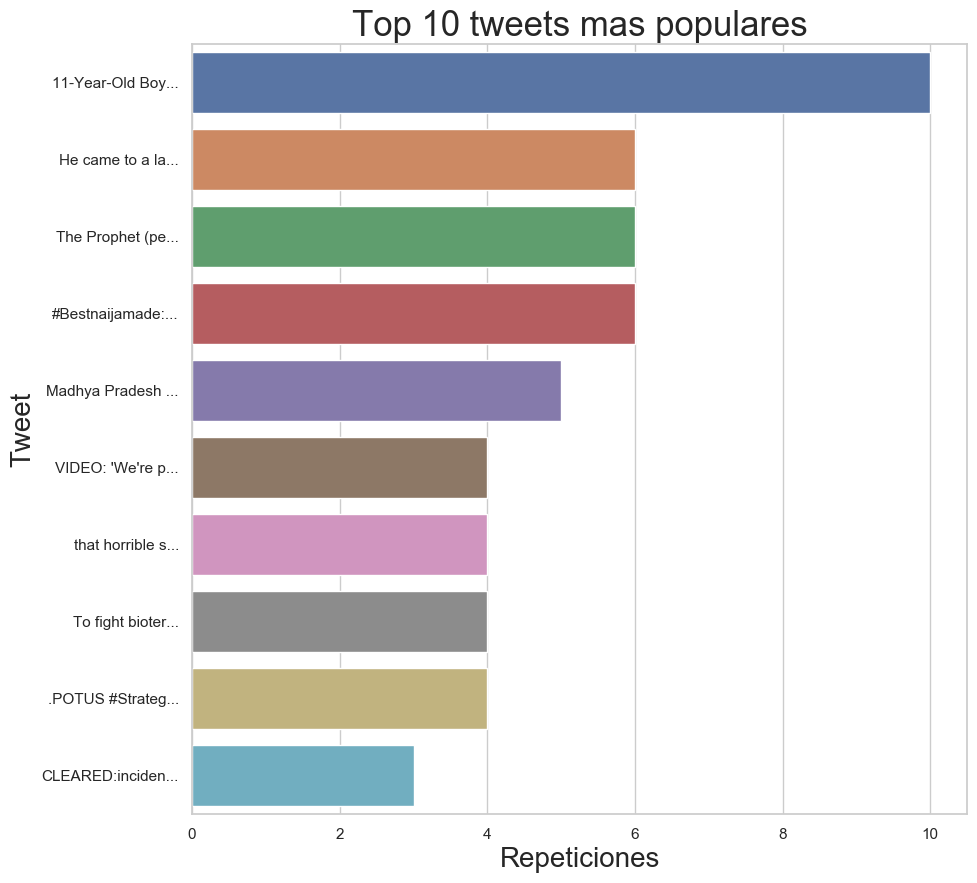

In [267]:
plt.rcParams['figure.figsize'] = (10, 10)

ax = sns.barplot(x="cantidad_de_tweets", y="short_text", data=C_TOP10tweets,orient='h')

ax.set_ylabel('Tweet', fontsize=20)
ax.set_xlabel('Repeticiones', fontsize=20)
ax.set_title("Top 10 tweets mas populares", fontsize=25)

## PLOT TOP 10 MENOS TWITEADOS (No aporta nada)

Text(0.5, 1.0, 'Top 10 tweets mas populares')

c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


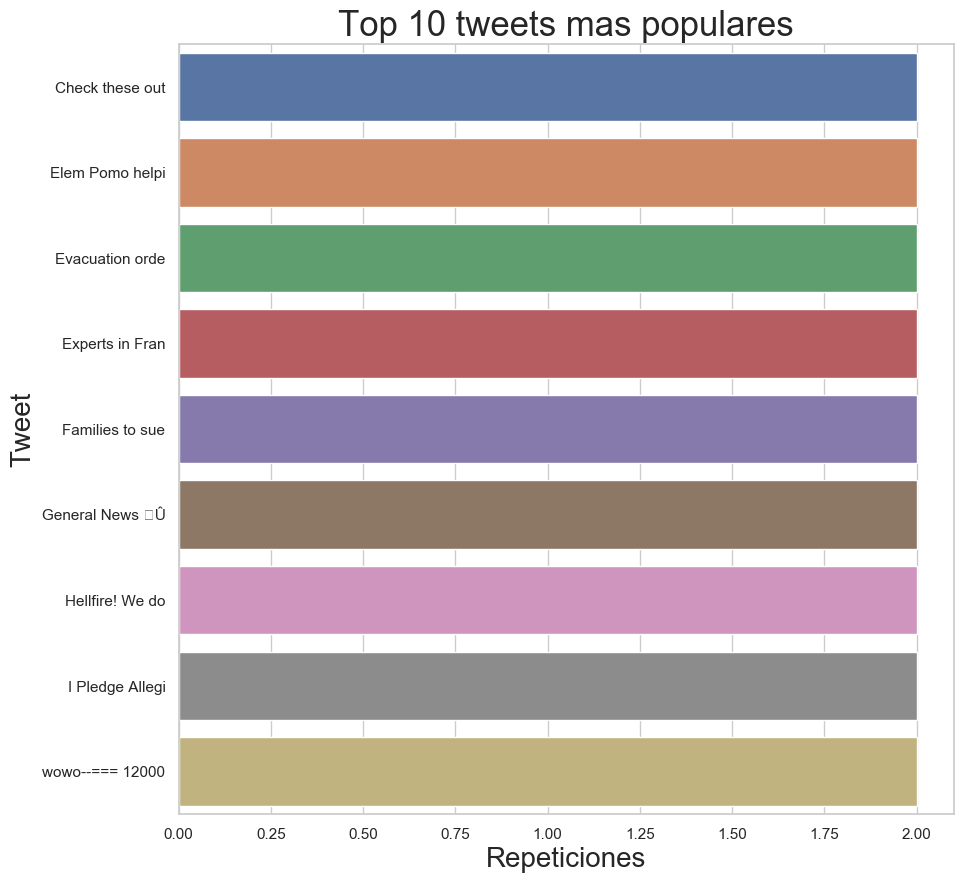

In [254]:
plt.rcParams['figure.figsize'] = (10, 10)

ax = sns.barplot(x="cantidad_de_tweets", y="short_text", data=C_TOP10tweets_menos,orient='h')

ax.set_ylabel('Tweet', fontsize=20)
ax.set_xlabel('Repeticiones', fontsize=20)
ax.set_title("Top 10 tweets mas populares", fontsize=25)

In [255]:
#Cantidad de twits que se repiten - Diferentes tweets repetidos = tweets repetidos
print (C_tweetsDuplicados.cantidad_de_tweets.sum() - len(C_tweetsDuplicados.index))

110


### Me da lo mismo que 7613 - 7503. Entonces, existen 110 tweets duplicados, por texto en el dataset